<a href="https://colab.research.google.com/github/sapiotee54/Python-projects/blob/main/Work_life_balance_score_pred_code_Nellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#check python version
!python --version

In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the dataset
df = pd.read_csv('/content/drive/MyDrive/Wellbeing_and_lifestyle_data_Kaggle.csv')
#view the top 5 rows
df.head(5)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


**DATA PREPROCESSING & EXPLORATORY DATA ANALYSIS**

In [ ]:
#drop the date timestamp column
df.drop('Timestamp', axis=1, inplace=True)
#describe the numeric variables dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15972 non-null  int64  
 1   DAILY_STRESS             15972 non-null  object 
 2   PLACES_VISITED           15972 non-null  int64  
 3   CORE_CIRCLE              15972 non-null  int64  
 4   SUPPORTING_OTHERS        15972 non-null  int64  
 5   SOCIAL_NETWORK           15972 non-null  int64  
 6   ACHIEVEMENT              15972 non-null  int64  
 7   DONATION                 15972 non-null  int64  
 8   BMI_RANGE                15972 non-null  int64  
 9   TODO_COMPLETED           15972 non-null  int64  
 10  FLOW                     15972 non-null  int64  
 11  DAILY_STEPS              15972 non-null  int64  
 12  LIVE_VISION              15972 non-null  int64  
 13  SLEEP_HOURS              15972 non-null  int64  
 14  LOST_VACATION         

In [ ]:
#detect error value and replace it with the mean value
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors='coerce')
daily_stress_mean = df['DAILY_STRESS'].mean()
df['DAILY_STRESS'] = df['DAILY_STRESS'].fillna(daily_stress_mean)

In [ ]:
#show the descriptive statistics for object features
df.describe(include = 'object')

,AGE,GENDER
count,15972,15972
unique,4,2
top,21 to 35,Female
freq,6108,9858


In [ ]:
#show the descriptive statistics for numeric features
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,...,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,2.791685,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,...,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,1.367758,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,...,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,...,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,...,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,...,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


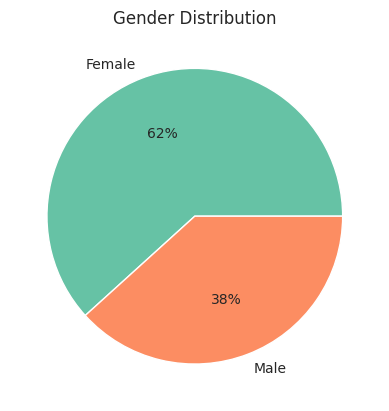

In [ ]:
sns.set_style('darkgrid')
sm = df.groupby('GENDER').agg({'WORK_LIFE_BALANCE_SCORE': 'count'})
plt.pie(data=sm, x='WORK_LIFE_BALANCE_SCORE', labels=sm.index, autopct='%.0f%%',
        colors = sns.color_palette('Set2')[0:7]) # Escape the second '%' symbol
plt.title('Gender Distribution')
plt.show()


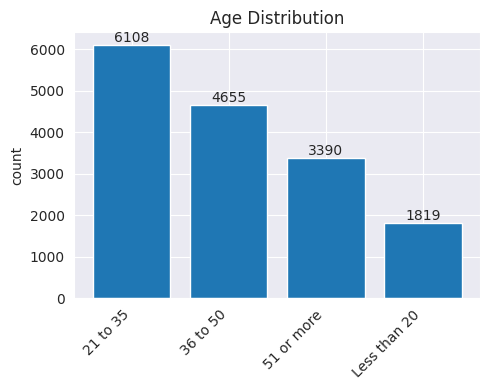

In [ ]:
#Plot a bar chart to visualise the age distribution
x = df['AGE']
plt.figure(figsize=(5, 4))
value_counts = x.value_counts().sort_index()

sns.set_style('darkgrid')
bars = plt.bar(value_counts.index, value_counts.values)
plt.title('Age Distribution')
plt.xticks(rotation=45, ha='right')
plt.ylabel('count')

# Add values on top of bars
for bar, value in zip(bars, value_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

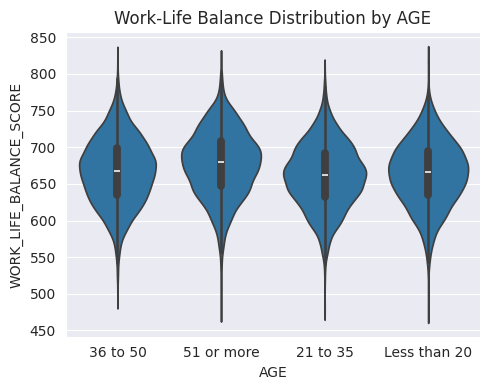

In [ ]:
#plot a violin chart to visualize the Work life balance distribution
fig, ax = plt.subplots(figsize=(5, 4))
sns.violinplot(data=df, x='AGE', y='WORK_LIFE_BALANCE_SCORE', ax=ax)
ax.set_title('Work-Life Balance Distribution by AGE')
plt.tight_layout()
plt.show()

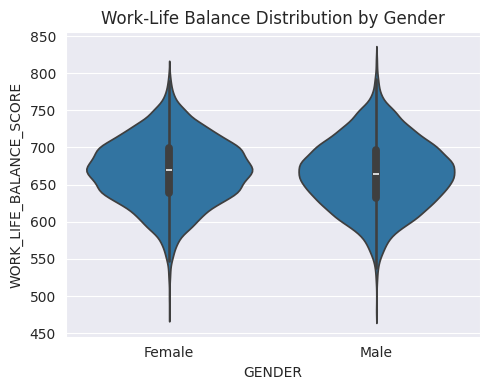

In [ ]:
#plot a violin chart to visualize the Work life balance distribution
fig, ax = plt.subplots(figsize=(5, 4))
sns.violinplot(data=df, x='GENDER', y='WORK_LIFE_BALANCE_SCORE', ax=ax)
ax.set_title('Work-Life Balance Distribution by Gender')
plt.tight_layout()
plt.show()

**CORRELATION ANALYSIS OF LIFESTYLE FACTORS WITH WORK LIFE BALANCE SCORE**

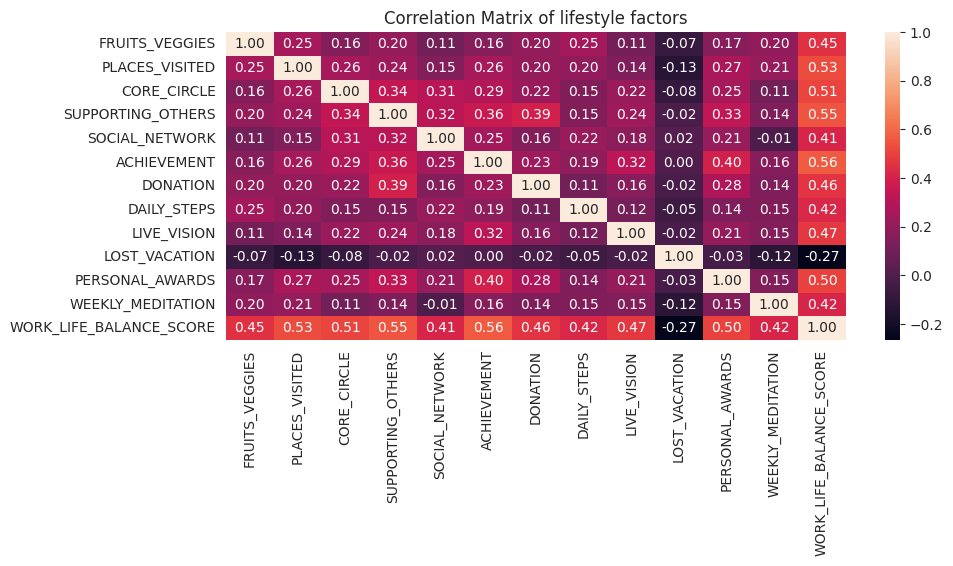

In [ ]:
lifestyle_factors = ['FRUITS_VEGGIES','PLACES_VISITED', 'CORE_CIRCLE','SUPPORTING_OTHERS',
      'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'DAILY_STEPS', 'LIVE_VISION','LOST_VACATION',
       'PERSONAL_AWARDS', 'WEEKLY_MEDITATION','WORK_LIFE_BALANCE_SCORE']
df[lifestyle_factors].corr()
plt.figure(figsize=(10, 4))
sns.heatmap(df[lifestyle_factors].corr(),annot=True, fmt=".2f")
plt.title("Correlation Matrix of lifestyle factors")
plt.show()

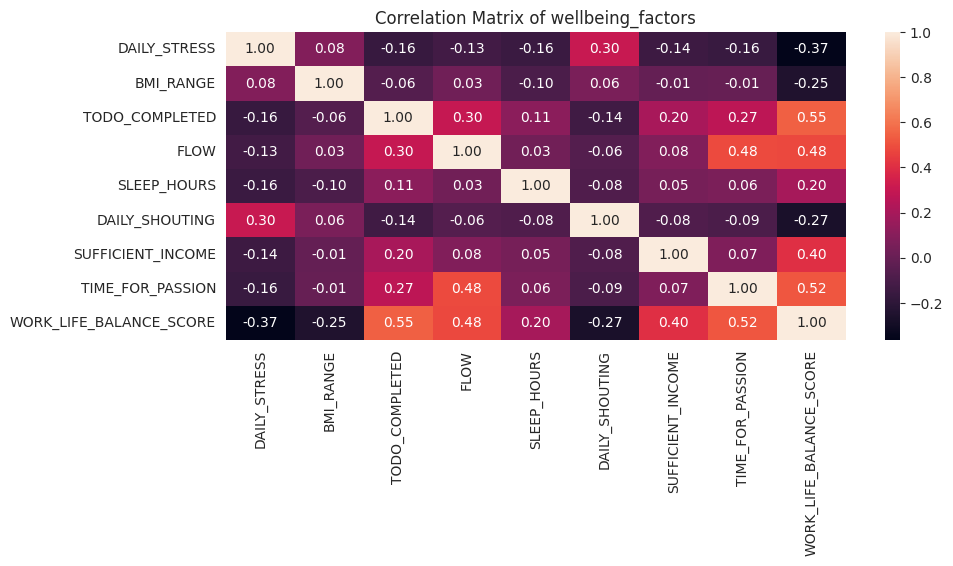

In [ ]:
wellbeing_factors = ['DAILY_STRESS','BMI_RANGE', 'TODO_COMPLETED', 'FLOW',
       'SLEEP_HOURS','DAILY_SHOUTING','SUFFICIENT_INCOME','TIME_FOR_PASSION','WORK_LIFE_BALANCE_SCORE']
plt.figure(figsize=(10, 4))
sns.heatmap(df[wellbeing_factors].corr(),annot=True, fmt=".2f")
plt.title("Correlation Matrix of wellbeing_factors")
plt.show()

**MODEL DEVELOPMENT - BEFORE FEATURE SELECTION**

In [ ]:
#import required functions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
#split data into x and y
x = df.drop(columns = ['WORK_LIFE_BALANCE_SCORE','AGE','GENDER']) #drop the columns
y = df['WORK_LIFE_BALANCE_SCORE']

In [ ]:
#initiate the scaler function
scaler = StandardScaler()

#create a pipeline

model = GradientBoostingRegressor()
rfe = RFE(estimator=model)
pipeline = Pipeline(steps=[('s',scaler),('selector',rfe),('model',model)])

features_param_grid = {"selector__n_features_to_select": range(19, 21)} #configured to select all independent features

grid_search = GridSearchCV(estimator=pipeline, param_grid=features_param_grid)

grid_search.fit(x, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'selector__n_features_to_select': 20}
Best Score: 0.9820061505754619


In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['param_selector__n_features_to_select', 'mean_test_score']])

   param_selector__n_features_to_select  mean_test_score
0                                    19         0.980680
1                                    20         0.982006


In [ ]:
#View the selected features for confirmation
best_estimator = grid_search.best_estimator_

rfe_selector = best_estimator.named_steps['selector']

# Get the selected features
selected_features = x.columns[rfe_selector.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION'],
      dtype='object')


In [ ]:
#import the linear regression model
from sklearn.linear_model import LinearRegression
#import evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error, r2_score


In [ ]:
#split the features into train, val and test set
selected_x_features = x[selected_features]
x_train, x_temp, y_train, y_temp = train_test_split(selected_x_features, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"training data shape: {x_train.shape}, validation data shape: {x_val.shape}, testing data shape: {x_test.shape}")

training data shape: (11180, 20), validation data shape: (2396, 20), testing data shape: (2396, 20)


In [ ]:
#Initiate the linear model(OLS)
lnr_model = LinearRegression()
lnr_model.fit(x_train, y_train)

print(f"Coefficients:, {lnr_model.coef_.round(3)}")
print(f"Intercept:, {lnr_model.intercept_.round(3)}")

Coefficients:, [  3.4    -3.4     1.7     1.7     1.7     1.7     1.7     3.4   -16.999
   1.7     1.7     1.9     1.7     1.9    -1.7    -1.7    17.001   1.7
   1.7     1.7  ]
Intercept:, 544.2


**EVALUATE THE LINEAR MODEL(OLS)**

In [ ]:
#Evaluate on the train set
y_pred1 = lnr_model.predict(x_train)
mse1 = mean_squared_error(y_train, y_pred1)
mae1 = mean_absolute_error(y_train, y_pred1)
rmse1 = np.sqrt(mse1)
r_sqrd1 = r2_score(y_train, y_pred1)
print("Mean Squared Error:", mse1.round(4))
print("Mean Absolute Error:", mae1.round(4))
print("Root Mean Squared Error:", rmse1.round(4))
print("R-squared:", round(r_sqrd1, 6))

Mean Squared Error: 0.0033
Mean Absolute Error: 0.0027
Root Mean Squared Error: 0.0576
R-squared: 0.999998


In [ ]:
#Evaluate on the validation set
y_pred2 = lnr_model.predict(x_val)
mse2 = mean_squared_error(y_val, y_pred2)
mae2 = mean_absolute_error(y_val, y_pred2)
rmse2 = np.sqrt(mse1)
r_sqrd2 = r2_score(y_val, y_pred2.round(4))
print("Mean Squared Error:", mse2.round(4))
print("Mean Absolute Error:", mae2.round(4))
print("Root Mean Squared Error:", rmse2.round(4))
print("R-squared:",round(r_sqrd2, 6))

Mean Squared Error: 0.0
Mean Absolute Error: 0.0021
Root Mean Squared Error: 0.0576
R-squared: 1.0


In [ ]:
#Evaluate on the test set
y_pred3 = lnr_model.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r_sqrd3= r2_score(y_test, y_pred3.round(4))
print("Mean Squared Error:", mse3.round(4))
print("Mean Absolute Error:", mae3.round(4))
print("Root Mean Squared Error:", rmse3.round(4))
print("R-squared:", round(r_sqrd3, 6))

Mean Squared Error: 0.0
Mean Absolute Error: 0.0021
Root Mean Squared Error: 0.0027
R-squared: 1.0


**DIAGNOSE THE LINEAR MODEL PERFORMANCE ON RESIDUAL PLOT**

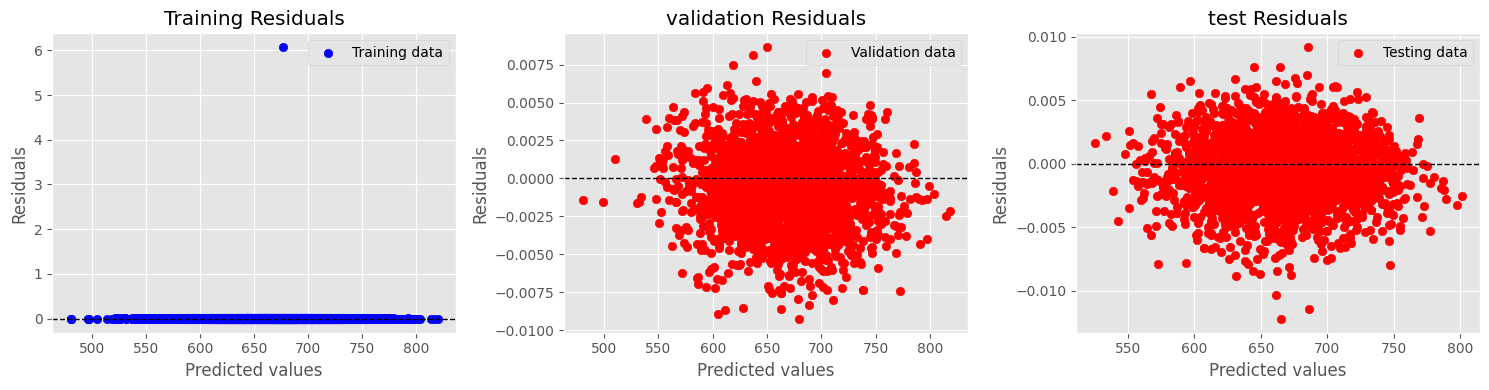

In [ ]:
# Calculate residuals
train_residuals = y_train - y_pred1
val_residuals = y_val - y_pred2
test_residuals = y_test - y_pred3

# Plot residuals
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)

plt.scatter(y_pred1, train_residuals, c='blue', marker='o', label='Training data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Training Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 2)

plt.scatter(y_pred2, val_residuals, c='red', marker='o', label='Validation data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('validation Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 3)

plt.scatter(y_pred3, test_residuals, c='red', marker='o', label='Testing data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('test Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

**LASSO MODEL BUILDING BEFORE FEATURE SELECTION**

In [ ]:
#import the lasso model
from sklearn.linear_model import Lasso
model1 = Lasso()
#create a pipeline for it
pipeline1 = Pipeline(steps=[('model',model1)])
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#Grid search applied to select optimal alpha
search1 = GridSearchCV(estimator=pipeline1, param_grid={'model__alpha': np.arange(0.1, 1, 0.01)}, cv = cv,
                                                        scoring = 'neg_mean_squared_error')
#train the model
lasso_model = search1.fit(x_train, y_train)

In [ ]:
#Print the coefficients, intercept and optimal alpha of the lasso model developed
print(f"Coefficients:, {lasso_model.best_estimator_.named_steps['model'].coef_.round(3)}")
print("Intercept:", lasso_model.best_estimator_.named_steps['model'].intercept_)
print("Best alpha:", lasso_model.best_params_['model__alpha'])

Coefficients:, [  3.388  -3.385   1.715   1.702   1.7     1.696   1.699   3.371 -16.578
   1.716   1.686   1.906   1.702   1.85   -1.698  -1.7    16.496   1.7
   1.697   1.704]
Intercept: 544.7297577561861
Best alpha: 0.1


**EVALUATE THE LASSO MODEL DEVELOPED**

In [ ]:
#Evaluate the train set
y_pred4 = lasso_model.predict(x_train)
mse4 = mean_squared_error(y_train, y_pred4)
mae4 = mean_absolute_error(y_train, y_pred4)
rmse4 = np.sqrt(mse4)
r_sqrd4 = r2_score(y_train, y_pred4.round(4))
print("Mean Squared Error:", mse4.round(4))
print("Mean Absolute Error:", mae4.round(4))
print("Root Mean Squared Error:", rmse4.round(4))
print("R-squared:", round(r_sqrd4,6))

Mean Squared Error: 0.1045
Mean Absolute Error: 0.268
Root Mean Squared Error: 0.3233
R-squared: 0.999949


In [ ]:
#Evaluate the validation set
y_pred5 = lasso_model.predict(x_val)
mse5 = mean_squared_error(y_val, y_pred5)
mae5 = mean_absolute_error(y_val, y_pred5)
rmse5 = np.sqrt(mse5)
r_sqrd5 = r2_score(y_val, y_pred5.round(4))
print("Mean Squared Error:", mse5.round(4))
print("Mean Absolute Error:", mae5.round(4))
print("Root Mean Squared Error:", rmse5.round(4))
print("R-squared:", round(r_sqrd5,6))

Mean Squared Error: 0.1022
Mean Absolute Error: 0.2687
Root Mean Squared Error: 0.3196
R-squared: 0.999951


In [ ]:
#Evaluate on the test set
y_pred6 = lasso_model.predict(x_test)
mse6 = mean_squared_error(y_test, y_pred6)
mae6 = mean_absolute_error(y_test, y_pred6)
rmse6 = np.sqrt(mse6)
r_sqrd6 = r2_score(y_test, y_pred6.round(4))
print("Mean Squared Error:", mse6.round(4))
print("Mean Absolute Error:", mae6.round(4))
print("Root Mean Squared Error:", rmse6.round(4))
print("R-squared:", round(r_sqrd6, 6))

Mean Squared Error: 0.102
Mean Absolute Error: 0.2679
Root Mean Squared Error: 0.3194
R-squared: 0.999948


DIAGNOSE THE LASSO MODEL DEVELOPED USING THE RESIDUAL PLOT

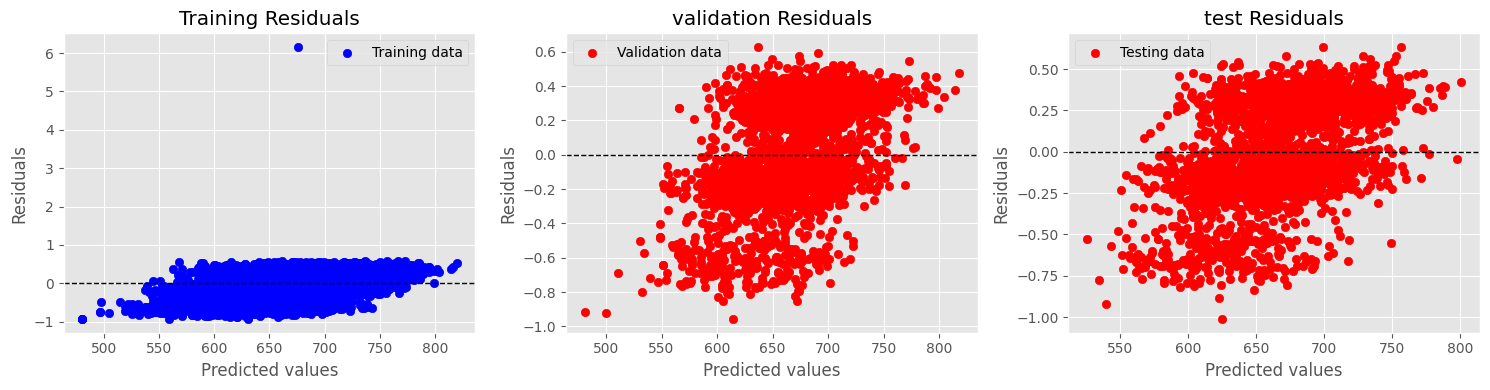

In [ ]:
# Calculate residuals
train_residuals = y_train - y_pred4
val_residuals = y_val - y_pred5
test_residuals = y_test - y_pred6

# Plot residuals
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)

plt.scatter(y_pred4, train_residuals, c='blue', marker='o', label='Training data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Training Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 2)

plt.scatter(y_pred5, val_residuals, c='red', marker='o', label='Validation data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('validation Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 3)

plt.scatter(y_pred6, test_residuals, c='red', marker='o', label='Testing data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('test Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

**RANDOM FOREST REGRESSION BUILDING  - BEFORE FEATURE SELECTION**

In [ ]:
#import the random forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#train the model
rf_model1 = rf_model.fit(x_train, y_train)

In [ ]:
#hyperparameter tunning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model1, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
#retrain the model with the new parameters
rf_model2 = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model2 = rf_model2.fit(x_train, y_train)

**EVALUATE THE RANDOM FOREST MODEL**

In [ ]:
#evaluate on train set
y_pred7 = rf_model2.predict(x_train)
mse7 = mean_squared_error(y_train, y_pred7)
mae7 = mean_absolute_error(y_train, y_pred7)
rmse7 = np.sqrt(mse7)
r_sqrd7 = r2_score(y_train, y_pred7)
print("Mean Squared Error:", mse7)
print("Mean Absolute Error:", mae7)
print("Root Mean Squared Error:", rmse7)
print("R-squared:", r_sqrd7)

Mean Squared Error: 17.364000517941157
Mean Absolute Error: 3.25570885586727
Root Mean Squared Error: 4.1670133810609675
R-squared: 0.9914674599488617


In [ ]:
#Evaluate on validation set
y_pred8 = rf_model2.predict(x_val)
mse8 = mean_squared_error(y_val, y_pred8)
mae8 = mean_absolute_error(y_val, y_pred8)
rmse8 = np.sqrt(mse8)
r_sqrd8 = r2_score(y_val, y_pred8)
print("Mean Squared Error:", mse8)
print("Mean Absolute Error:", mae8)
print("Root Mean Squared Error:", rmse8)
print("R-squared:", r_sqrd8)

Mean Squared Error: 122.8952664847382
Mean Absolute Error: 8.653860867894771
Root Mean Squared Error: 11.085813749325675
R-squared: 0.9405589039727085


In [ ]:
#Evaluate on the test set
y_pred9 = rf_model2.predict(x_test)
mse9 = mean_squared_error(y_test, y_pred9)
mae9 = mean_absolute_error(y_test, y_pred9)
rmse9 = np.sqrt(mse9)
r_sqrd9 = r2_score(y_test, y_pred9.round(4))
print("Mean Squared Error:", mse9.round(4))
print("Mean Absolute Error:", mae9.round(4))
print("Root Mean Squared Error:", rmse9.round(4))
print("R-squared:", round(r_sqrd9,6))

Mean Squared Error: 119.4589
Mean Absolute Error: 8.5281
Root Mean Squared Error: 10.9297
R-squared: 0.938613


**DIAGNOSE THE RANDOM FOREST MODEL BUILT USING RESIDUAL PLOT**

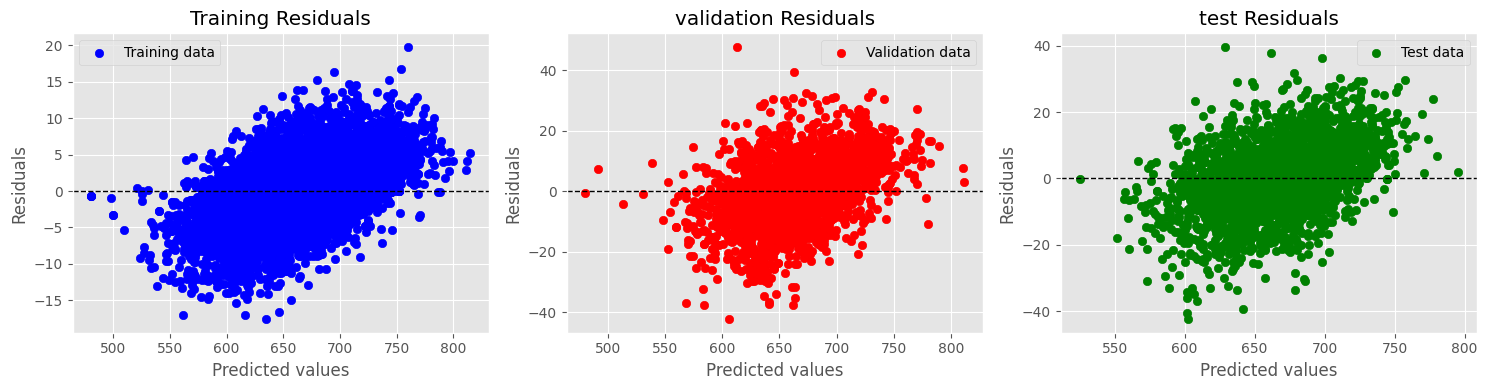

In [ ]:
# Calculate residuals
train_residuals = y_train - y_pred7
val_residuals = y_val - y_pred8
test_residuals = y_test - y_pred9

# Plot residuals
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)

plt.scatter(y_pred7, train_residuals, c='blue', marker='o', label='Training data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Training Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 2)

plt.scatter(y_pred8, val_residuals, c='red', marker='o', label='Validation data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('validation Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 3)

plt.scatter(y_pred9, test_residuals, c='green', marker='o', label='Test data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('test Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

**MODEL DEVELOPMENT WITH THE TOP 10 MOST IMPORTANT FEATURES SELECTED**

In [ ]:
model_sel = GradientBoostingRegressor()
rfe = RFE(estimator=model_sel, n_features_to_select=10)  # Set n_features_to_select to 10
pipeline1 = Pipeline(steps=[('s', scaler), ('selector', rfe), ('model', model_sel)])

pipeline1.fit(x, y)  # Fit the pipeline directly

selected_features1 = x.columns[pipeline1.named_steps['selector'].support_]

print("Selected Features:", selected_features1)


Selected Features: Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'ACHIEVEMENT', 'TODO_COMPLETED', 'LIVE_VISION', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION'],
      dtype='object')


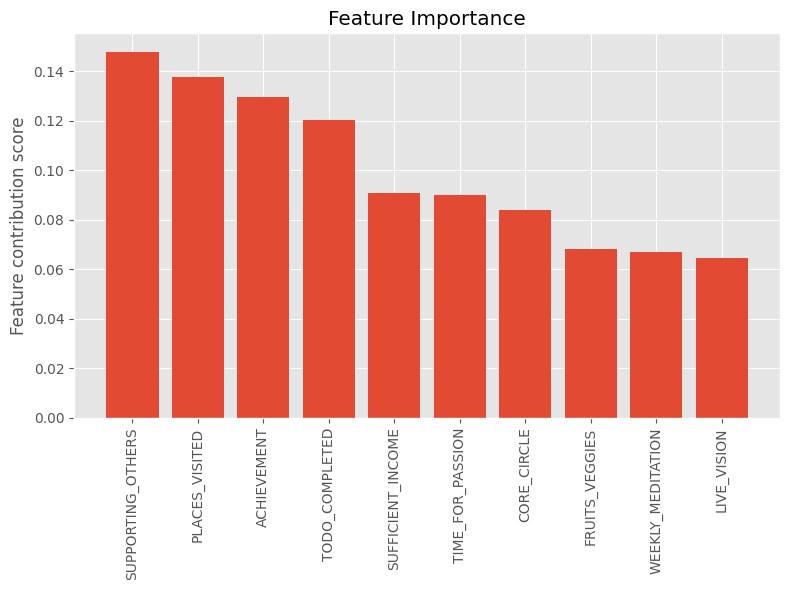

Selected Features: Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'ACHIEVEMENT', 'TODO_COMPLETED', 'LIVE_VISION', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION'],
      dtype='object')


In [ ]:
trained_model = pipeline1.named_steps['model']

# Get feature importances from the trained model
importances = trained_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importance")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), selected_features1[indices], rotation=90)
plt.ylabel('Feature contribution score')
plt.tight_layout()
plt.show()

print("Selected Features:", selected_features1)

In [ ]:
selected_features1 = x.columns[pipeline1.named_steps['selector'].support_]

# Access selected features using column names
selected_features1 = x[selected_features1.tolist()]

In [ ]:
#split the new selected x features into train, validate and test sets
x_train2, x_temp2, y_train2, y_temp2 = train_test_split(selected_features1, y, test_size=0.3, random_state=42)
x_val2, x_test2, y_val2, y_test2 = train_test_split(x_temp2, y_temp2, test_size=0.5, random_state=42)
#print the shape of the sets
print(f"training data shape: {x_train2.shape}, validation data shape: {x_val2.shape}, testing data shape: {x_test2.shape}")

training data shape: (11180, 10), validation data shape: (2396, 10), testing data shape: (2396, 10)


**RETRAIN THE LINEAR MODEL(OLS) WITH THE 10 MOST IMPORTANT FEATURES**

In [ ]:
#Initialize the Linear model
lnr_model2 = LinearRegression()
#fit the model on the train set
lnr_model2.fit(x_train2, y_train2)
#print the coefficients of the model and the intercept
print(f"Coefficients:, {lnr_model2.coef_.round(3)}")
print(f"Intercept:, {lnr_model2.intercept_.round(3)}")

Coefficients:, [ 5.171  2.709  2.806  2.446  2.552  3.039  2.059 20.814  2.512  2.669]
Intercept:, 511.81


**EVALUATE THE LINEAR MODEL RETRAINED WITH 10 FEATURES**

In [ ]:
#Evaluate the model on the train set
y_pred10 = lnr_model2.predict(x_train2)
mse10 = mean_squared_error(y_train2, y_pred10)
mae10 = mean_absolute_error(y_train2, y_pred10)
rmse10 = np.sqrt(mse10)
r_sqrd10 = r2_score(y_train2, y_pred10)
print("Mean Squared Error:", mse10.round(4))
print("Mean Absolute Error:", mae10.round(4))
print("Root Mean Squared Error:", rmse10.round(4))
print("R-squared:", round(r_sqrd10, 6))

Mean Squared Error: 294.1603
Mean Absolute Error: 13.7552
Root Mean Squared Error: 17.1511
R-squared: 0.855452


In [ ]:
#validate the model on the validation set
y_pred11 = lnr_model2.predict(x_val2)
mse11 = mean_squared_error(y_val2, y_pred11)
mae11 = mean_absolute_error(y_val2, y_pred11)
rmse11 = np.sqrt(mse11)
r_sqrd11 = r2_score(y_val2, y_pred11)
print("Mean Squared Error:", mse11.round(4))
print("Mean Absolute Error:", mae11.round(4))
print("Root Mean Squared Error:", rmse11.round(4))
print("R-squared:", round(r_sqrd11, 6))

Mean Squared Error: 307.8332
Mean Absolute Error: 14.1574
Root Mean Squared Error: 17.5452
R-squared: 0.851109


In [ ]:
#Evaluate the model on the test set
y_pred12 = lnr_model2.predict(x_test2)
mse12 = mean_squared_error(y_test2, y_pred12)
mae12 = mean_absolute_error(y_test2, y_pred12)
rmse12 = np.sqrt(mse12)
r_sqrd12 = r2_score(y_test2, y_pred12)
print("Mean Squared Error:", mse12.round(4))
print("Mean Absolute Error:", mae12.round(4))
print("Root Mean Squared Error:", rmse12.round(4))
print("R-squared:", round(r_sqrd12, 6))

Mean Squared Error: 291.8681
Mean Absolute Error: 13.6701
Root Mean Squared Error: 17.0841
R-squared: 0.850016


**DIAGNOSE THE RETRAINED LINEAR MODEL USING THE LEARNING CURVE**

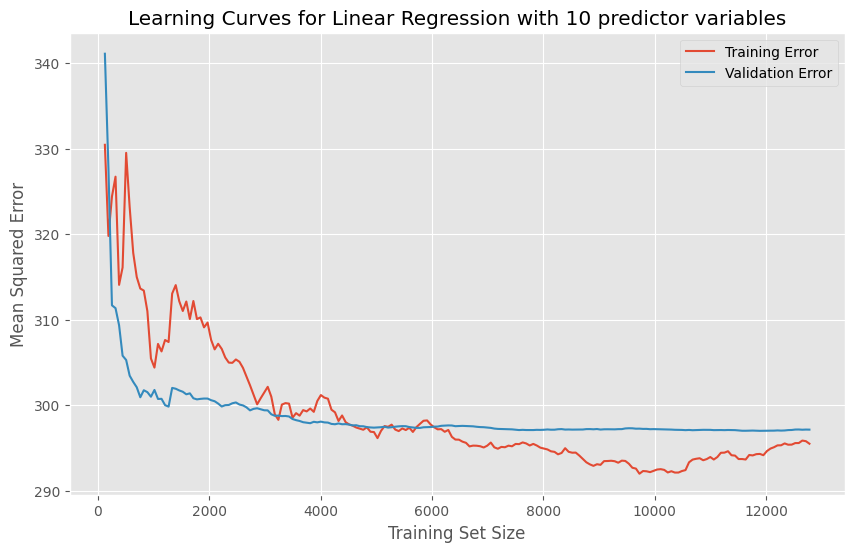

In [ ]:
#plot the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    lnr_model2, selected_features1, y, train_sizes=np.linspace(0.01, 1.0, 200), cv=5, scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, val_scores_mean, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Linear Regression with 10 predictor variables')
plt.legend()
plt.grid(True)
plt.show()

**DIAGNOSE THE RETRAINED LINEAR MODEL USING THE RESIDUAL PLOT**

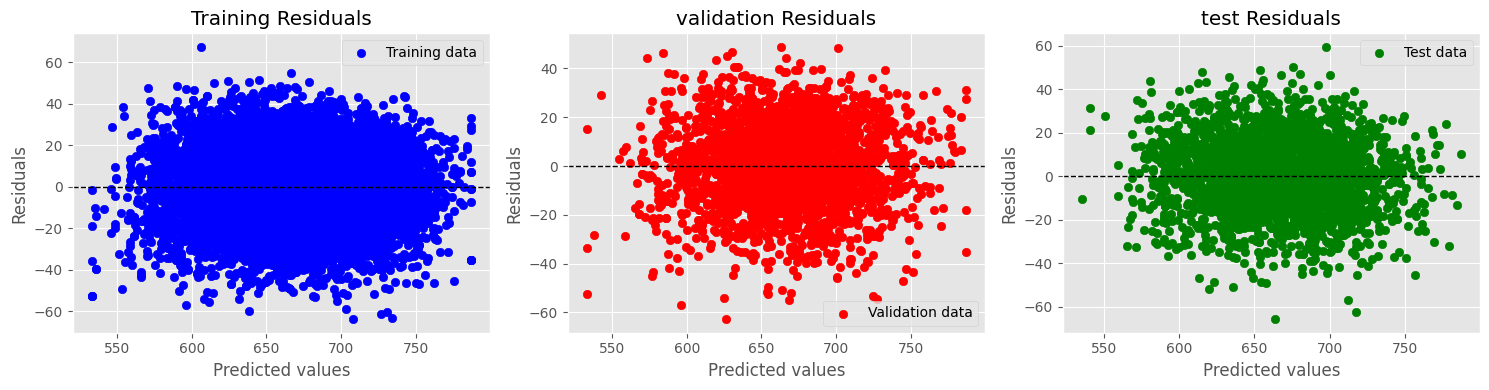

In [ ]:
# Calculate residuals
train_residuals = y_train2 - y_pred10
val_residuals = y_val2 - y_pred11
test_residuals = y_test2 - y_pred12

# Plot residuals
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)

plt.scatter(y_pred10, train_residuals, c='blue', marker='o', label='Training data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Training Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 2)

plt.scatter(y_pred11, val_residuals, c='red', marker='o', label='Validation data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('validation Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 3)

plt.scatter(y_pred12, test_residuals, c='green', marker='o', label='Test data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('test Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

**LASSO REGRESSION RETRAINED WITH THE 10 MOST IMPORTANT FEATURES**

In [ ]:
#Initiate the lasso model
model1 = Lasso()
pipeline1 = Pipeline(steps=[('model',model1)])
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search1 = GridSearchCV(estimator=pipeline1, param_grid={'model__alpha': np.arange(0.1, 1, 0.01)}, cv = cv,
                                                        scoring = 'neg_mean_squared_error')

lasso_model2 = search1.fit(x_train2, y_train2)

In [ ]:
#Print the model coefficients, intercept and optimal alpha value
print(f"Coefficients:, {lasso_model2.best_estimator_.named_steps['model'].coef_.round(3)}")
print("Intercept:", lasso_model2.best_estimator_.named_steps['model'].intercept_)
print("Best alpha:", lasso_model2.best_params_['model__alpha'])

Coefficients:, [ 5.144  2.716  2.804  2.448  2.55   3.046  2.061 20.308  2.505  2.665]
Intercept: 512.7438494513799
Best alpha: 0.1


**EVALUATE THE RETRAINED LASSO MODEL**

In [ ]:
#Evaluate on the train set
y_pred13 = lasso_model2.predict(x_train2)
mse13 = mean_squared_error(y_train2, y_pred13)
mae13 = mean_absolute_error(y_train2, y_pred13)
rmse13 = np.sqrt(mse13)
r_sqrd13 = r2_score(y_train2, y_pred13.round(4))
print("Mean Squared Error:", mse13.round(4))
print("Mean Absolute Error:", mae13.round(4))
print("Root Mean Squared Error:", rmse13.round(4))
print("R-squared:", round(r_sqrd13,6))

Mean Squared Error: 294.2135
Mean Absolute Error: 13.7556
Root Mean Squared Error: 17.1527
R-squared: 0.855426


In [ ]:
#Evalauate on the validation set
y_pred14 = lasso_model2.predict(x_val2)
mse14 = mean_squared_error(y_val2, y_pred14)
mae14 = mean_absolute_error(y_val2, y_pred14)
rmse14 = np.sqrt(mse14)
r_sqrd14 = r2_score(y_val2, y_pred14.round(4))
print("Mean Squared Error:", mse14.round(4))
print("Mean Absolute Error:", mae14.round(4))
print("Root Mean Squared Error:", rmse14.round(4))
print("R-squared:", round(r_sqrd14,6))

Mean Squared Error: 307.9259
Mean Absolute Error: 14.1574
Root Mean Squared Error: 17.5478
R-squared: 0.851065


In [ ]:
#Evaluate on the test set
y_pred15 = lasso_model2.predict(x_test2)
mse15 = mean_squared_error(y_test2, y_pred15)
mae15 = mean_absolute_error(y_test2, y_pred15)
rmse15 = np.sqrt(mse15)
r_sqrd15 = r2_score(y_test2, y_pred15.round(4))
print("Mean Squared Error:", mse15.round(4))
print("Mean Absolute Error:", mae15.round(4))
print("Root Mean Squared Error:", rmse15.round(4))
print("R-squared:", round(r_sqrd15,6))

Mean Squared Error: 291.9324
Mean Absolute Error: 13.67
Root Mean Squared Error: 17.086
R-squared: 0.849983


**DIAGNODE THE RETRAINED LASSO MODEL, PLOTTING ITS LEARNING CURVE**

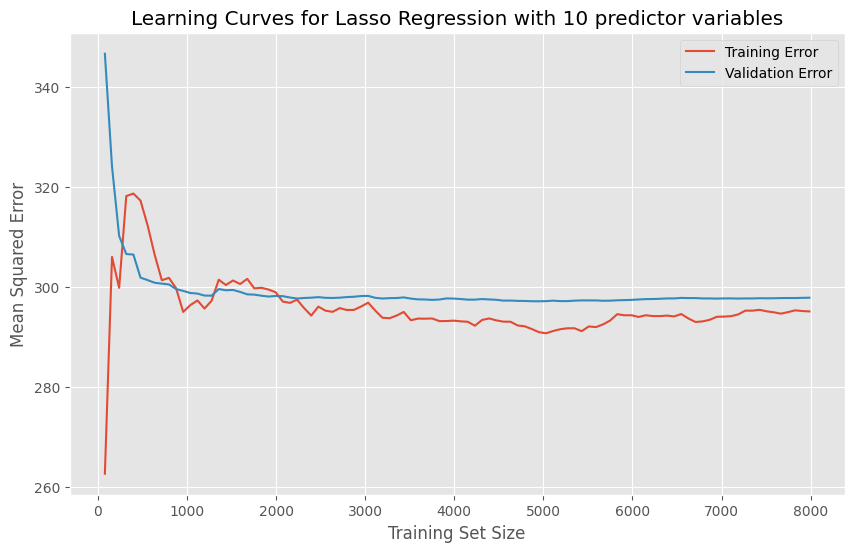

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    lasso_model2, selected_features1, y, train_sizes=np.linspace(0.01, 1.0, 100), cv=2, scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, val_scores_mean, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Lasso Regression with 10 predictor variables')
plt.legend()
plt.grid(True)
plt.show()

**DIGNOSE THE RETRAINED LASSO MODEL USING THE RESIDUAL PLOT**

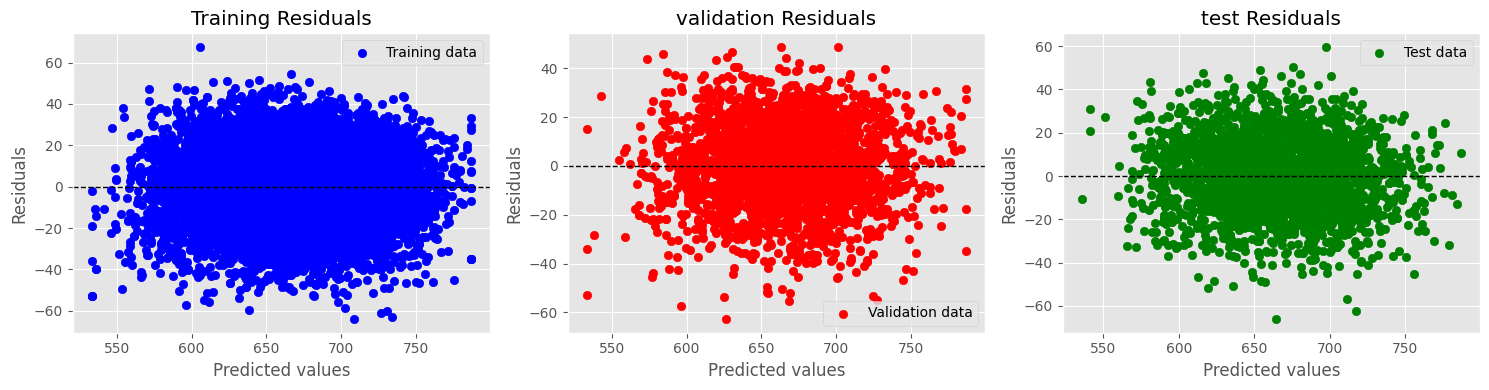

In [ ]:
# Calculate residuals
train_residuals = y_train2 - y_pred13
val_residuals = y_val2 - y_pred14
test_residuals = y_test2 - y_pred15

# Plot residuals
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)

plt.scatter(y_pred13, train_residuals, c='blue', marker='o', label='Training data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Training Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 2)

plt.scatter(y_pred14, val_residuals, c='red', marker='o', label='Validation data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('validation Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 3)

plt.scatter(y_pred15, test_residuals, c='green', marker='o', label='Test data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('test Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

**RANDOM FOREST REGRESSION WITH 10 MOST IMPORTANT FEATURES**

In [ ]:
#retrain the model with the 10 selected features
rf_model = RandomForestRegressor(n_estimators=100, max_depth =10, random_state=42)
rf_model2 = rf_model.fit(x_train2, y_train2)


In [ ]:
#hyper_parameter tunning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train2, y_train2)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
#Implement with the new paramters and retrain the model
rf_model3 = RandomForestRegressor(n_estimators=200, max_depth =20, random_state=42)
rf_model3 = rf_model3.fit(x_train2, y_train2)

**EVALUATE THE RETRAINED RANDOM FOREST MODEL**

In [ ]:
#Evaluate on the train set
y_pred16 = rf_model3.predict(x_train2)
mse16 = mean_squared_error(y_train2, y_pred16)
mae16 = mean_absolute_error(y_train2, y_pred16)
rmse16 = np.sqrt(mse16)
r_sqrd16 = r2_score(y_train2, y_pred16)
print("Mean Squared Error:", mse16)
print("Mean Absolute Error:", mae16)
print("Root Mean Squared Error:", rmse16)
print("R-squared:", r_sqrd16)

Mean Squared Error: 44.539186424902596
Mean Absolute Error: 5.213461665152021
Root Mean Squared Error: 6.6737685324636935
R-squared: 0.9781137767403926


In [ ]:
#Evaluate on the validation set
y_pred17 = rf_model3.predict(x_val2)
mse17 = mean_squared_error(y_val2, y_pred17)
mae17 = mean_absolute_error(y_val2, y_pred17)
rmse17 = np.sqrt(mse17)
r_sqrd17 = r2_score(y_val2, y_pred17)
print("Mean Squared Error:", mse17)
print("Mean Absolute Error:", mae17)
print("Root Mean Squared Error:", rmse17)
print("R-squared:", r_sqrd17)

Mean Squared Error: 321.1782664346319
Mean Absolute Error: 14.133722441701034
Root Mean Squared Error: 17.921447107715156
R-squared: 0.8446548128085077


In [ ]:
#Evaluate on the test set
y_pred18 = rf_model2.predict(x_test2)
mse18 = mean_squared_error(y_test2, y_pred18)
mae18 = mean_absolute_error(y_test2, y_pred18)
rmse18 = np.sqrt(mse18)
r_sqrd18 = r2_score(y_test2, y_pred18)
print("Mean Squared Error:", mse18)
print("Mean Absolute Error:", mae18)
print("Root Mean Squared Error:", rmse18)
print("R-squared:", r_sqrd18)

**DIAGNOSE THE RETRAINED RANDOM FOREST MODEL, PLOTTING A LEARNING CURVE**

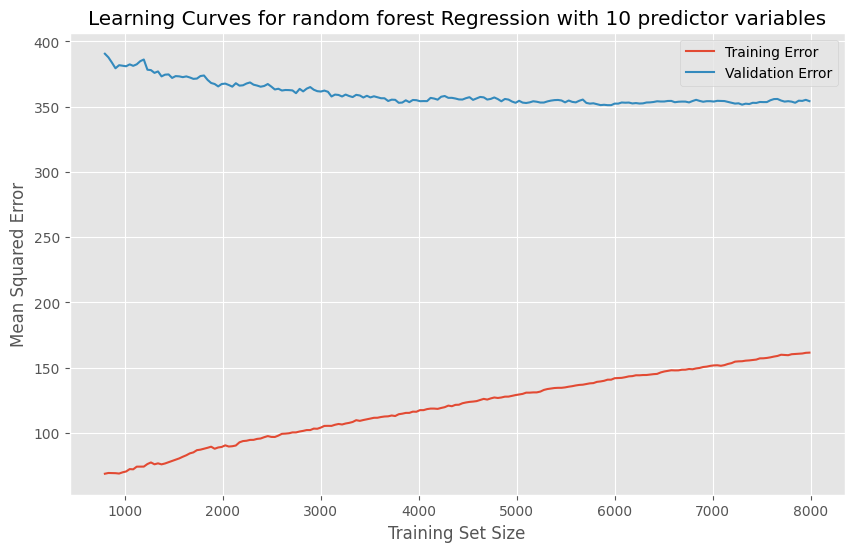

In [ ]:
#plot the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    rf_model2, selected_features1, y, train_sizes=np.linspace(0.1, 1.0, 200), cv=2, scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, val_scores_mean, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for random forest Regression with 10 predictor variables')
plt.legend()
plt.grid(True)
plt.show()

**DIAGNOSE THE RETRAINED RANDOM FOREST MODEL USING THE RESIDUAL PLOT**

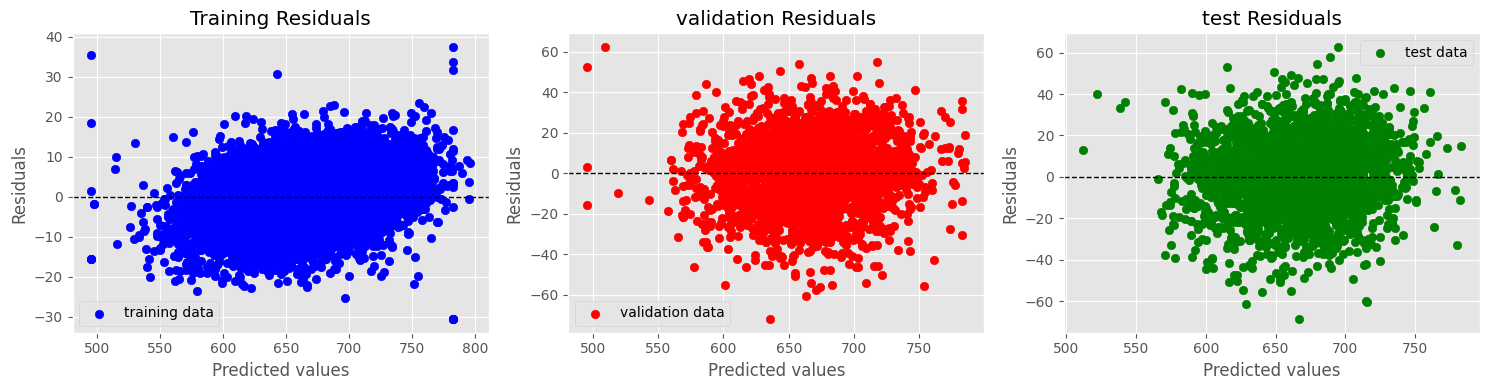

In [ ]:
# Calculate residuals
train_residuals = y_train2 - y_pred16
val_residuals = y_val2 - y_pred17
test_residuals = y_test2 - y_pred18

# Plot residuals for Random forest regression
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)

plt.scatter(y_pred16, train_residuals, c='blue', marker='o', label='training data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Training Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 2)

plt.scatter(y_pred17, val_residuals, c='red', marker='o', label='validation data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('validation Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 3, 3)

plt.scatter(y_pred18, test_residuals, c='green', marker='o', label='test data')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('test Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()